# Bank Churn Prediction Model 🚀
## 1️⃣ Introduction
- What is churn?
  * Churn refers to the rate at which customers stop doing business with a company over a given period. It is a critical metric for businesses, especially in subscription-based industries like banking, telecom, SaaS (Software as a Service), and e-commerce.
    
- Why is it important for banks?
  * Customer churn is a major concern for banks because losing customers means losing revenue, market share, and trust. In the highly competitive banking industry, retaining customers is more cost-effective than acquiring new ones.
  

## 2️⃣ Data Preprocessing  
- Handled missing values  
- Encoded categorical variables  
- Scaled numerical features  

## 3️⃣ Model Training & Evaluation  
- Used `catboost classifier`  
- Achieved **85% accuracy**  
- Precision & Recall insights

### How Banks Can Reduce Churn Using Data Analytics & ML 📈
 * Personalized offers (customized loans, rewards, discounts)
 * Proactive customer service (identifying at-risk customers early)
 * Fee transparency (clear breakdown of charges)
 * Enhanced digital experience (better mobile banking & online services)
 * Loyalty programs (cashback, premium account benefits)




In [9]:
!pip install category_encoders
#for target encoding

In [10]:
# Import necessary libraries
from IPython import get_ipython
from IPython.display import display
import pandas as pd  # For working with data in a tabular format
import numpy as np  # For numerical operations, especially with arrays
import matplotlib.pyplot as plt  # For creating visualizations (plots, charts)
%matplotlib inline
# This line makes sure plots are displayed directly within the notebook
import seaborn as sns  # For more advanced and visually appealing plots

import category_encoders as ce  # For encoding categorical features (like converting text categories to numbers)
from sklearn.model_selection import train_test_split
# For splitting data into training and testing sets (essential for evaluating models)
from sklearn.preprocessing import StandardScaler  # For scaling numerical features (helps improve model performance)

# For evaluating the performance of machine learning models
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [13]:
# Load the dataset
df = pd.read_csv('Churn_Modelling.csv')
df.head()  # Display the first few rows of the data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
# Display information about the dataset
df.info()  # Shows data types, non-null counts, etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [17]:
# Check for duplicate rows
df.duplicated().sum()  # Counts the number of duplicate rows

0

In [19]:
# Check for missing values in each column
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [21]:
# Display descriptive statistics of the dataset
df.describe()  # Provides summary statistics (mean, std, etc.)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [23]:
# Statistical summary of object (categorical) columns
df.describe(include='object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [25]:
# Confirm the data types
print(df.dtypes)

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


In [27]:
# Ignore warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

In [29]:
# Get numerical features
numerical_features = df.select_dtypes(include='number').columns
len(numerical_features) # Get the count of numerical features
numerical_features # Display numerical features

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [31]:
# Get categorical features
categorical_features = df.select_dtypes(include='object').columns
len(categorical_features) # Get the count of categorical features
categorical_features # Display categorical features

Index(['Surname', 'Geography', 'Gender'], dtype='object')

### EDA
- * Data Collection & Preprocessing:
- *  Perform exploratory data analysis (EDA) to find trends in churn behavior.
- * Engineer features like frequency of purchases, customer lifetime value, and last transaction date.
We collected customer data (demographics, account details, service usage) and performed extensive cleaning.

# Box Plot
- Explanation: A box plot displays the distribution of a dataset based on a five-number summary: minimum, first quartile, median, third quartile, and maximum.
- Boxplots quickly reveal data distribution, central tendency, and the presence of outliers which might need to be handled (e.g., removed or transformed) before modeling.
- OUTLIERS IN This boxplot indicate values that are significantly lower or higher than the rest of the data and may need further investigation.
- The horizontal line in each box represents the median value.
- Understanding the distribution helps in deciding if you need to normalize or transform features, especially if outliers are skewing the data.

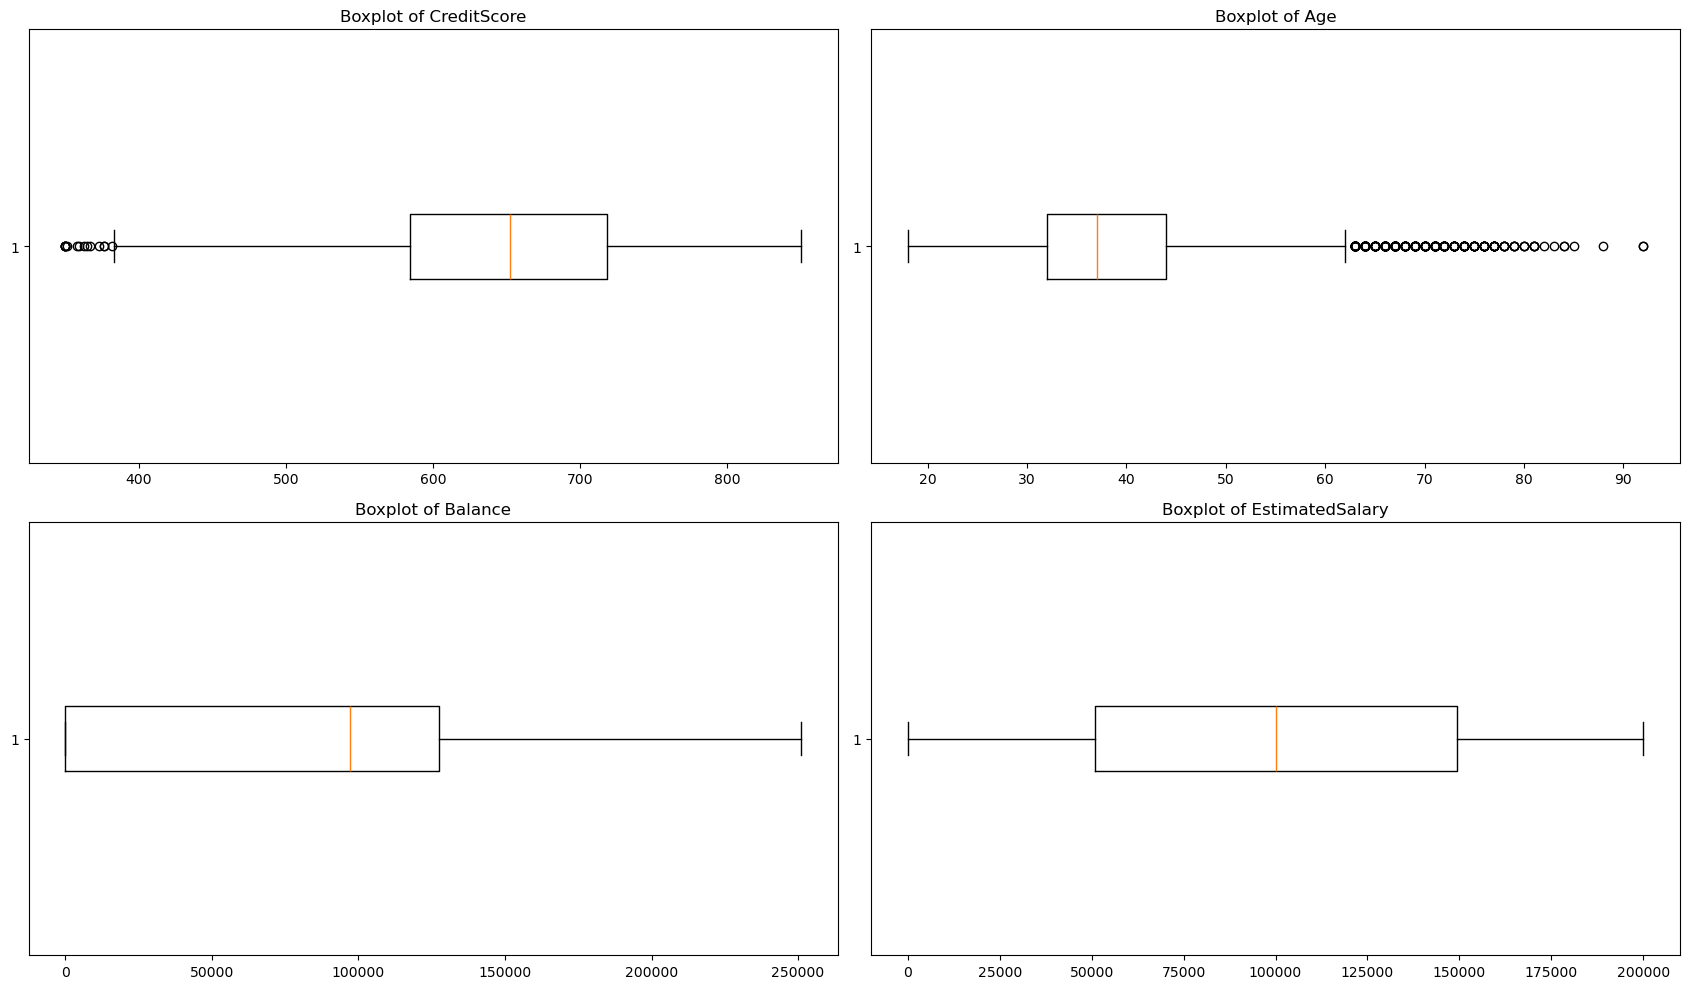

In [33]:
# Exploratory Data Analysis (EDA)

# Box Plot for numerical features
numerical_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

plt.figure(figsize=(17, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    plt.boxplot(df[feature], vert=False)
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

### Univariate Analysis

In [35]:
# Univariate Analysis for Credit Score

df['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

## KDE (Kernel Density Estimate) plot
-  This KDE plot provides a smooth curve that represents the distribution (or density) of the CreditScore variable.
-  Distribution Shape: The curve shows where CreditScores are most concentrated. Peaks in the curve indicate ranges with higher frequencies of scores.
-  A wider curve indicates more variability in credit scores
-  A narrow curve implies that most credit scores are close to the central value

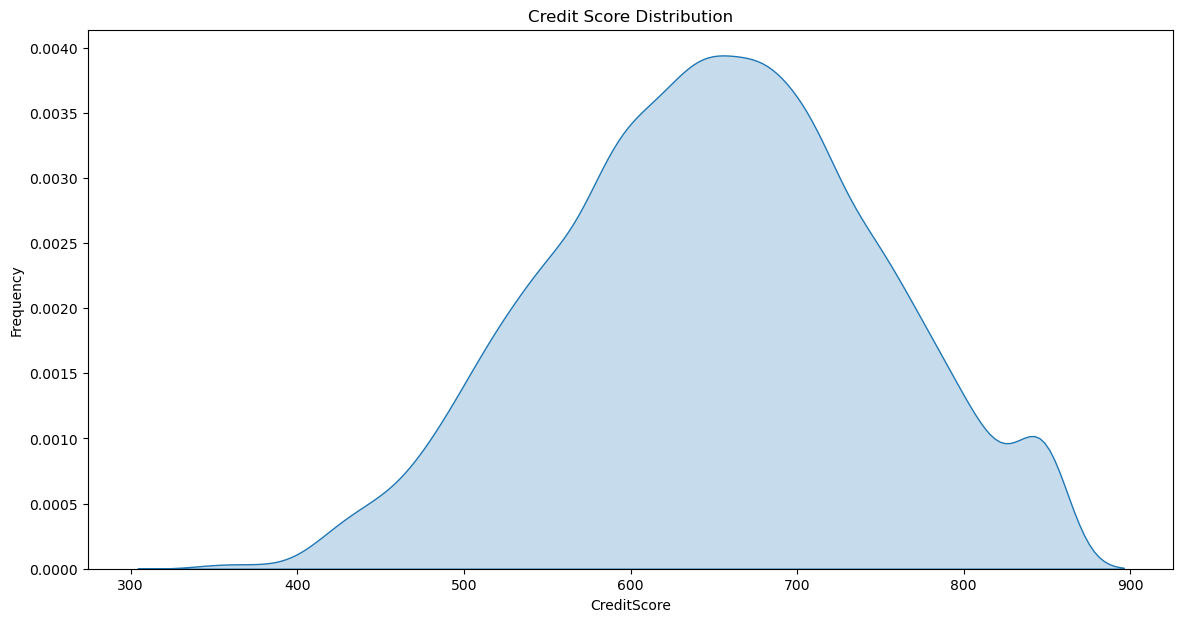

In [37]:
# KDE (Kernel Density Estimate) plot for Credit Score
plt.figure(figsize=(14, 7))

sns.kdeplot(df['CreditScore'], fill=True, palette="Set2")
plt.title('Credit Score Distribution')
plt.xlabel('CreditScore')
plt.ylabel('Frequency')

plt.show()

### Geography Column

In [39]:
# Analysis of Geography column
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [41]:
# Get the counts for each geography category
count = df["Geography"].value_counts()

### pie chart
- This pie chart helps to visualize the distribution of customers across different geographical categories, visually breaks down the total customer base by geographic regions. Each slice represents a different geographic category.
- The exploded slice emphasizes one region, drawing attention to its share, while the percentage labels provide precise quantitative information.

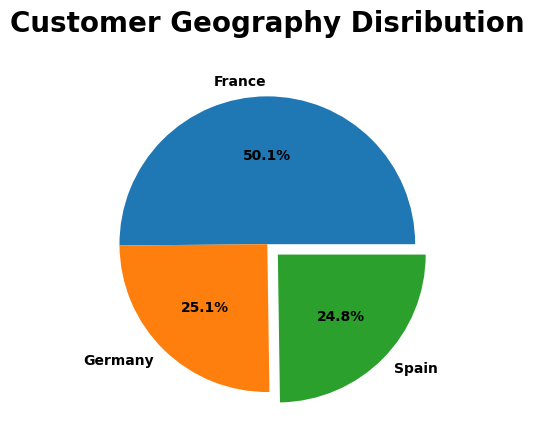

In [44]:
# Pie chart for Customer Geography Distribution
plt.subplot(1,1,1)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0, 0,0.1])
plt.title("Customer Geography Disribution",fontweight="black",size=20,pad=20)

plt.show()

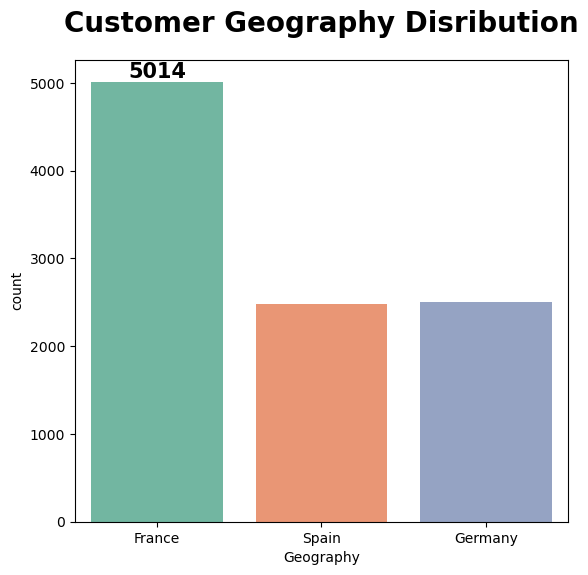

In [46]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df, x="Geography",palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Customer Geography Disribution",fontweight="black",size=20,pad=20)

plt.show()

In [48]:
df["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [50]:
count = df["Gender"].value_counts()

## count plot
- This plot displays the number of customers for each gender (typically "Male" and "Female") as bars.
- The pie chart shows what percentage of the total customer base each gender represents.
- The exploded slice emphasizes one of the groups, making it easier to compare relative proportions
- Count Plot: Provides precise numerical counts of each gender.
- Pie Chart: Shows the relative percentage of each gender, highlighting any imbalance visually.
* Insights:
- If the counts (and thus the percentages) differ notably between genders, it may signal a skewed customer demographic.

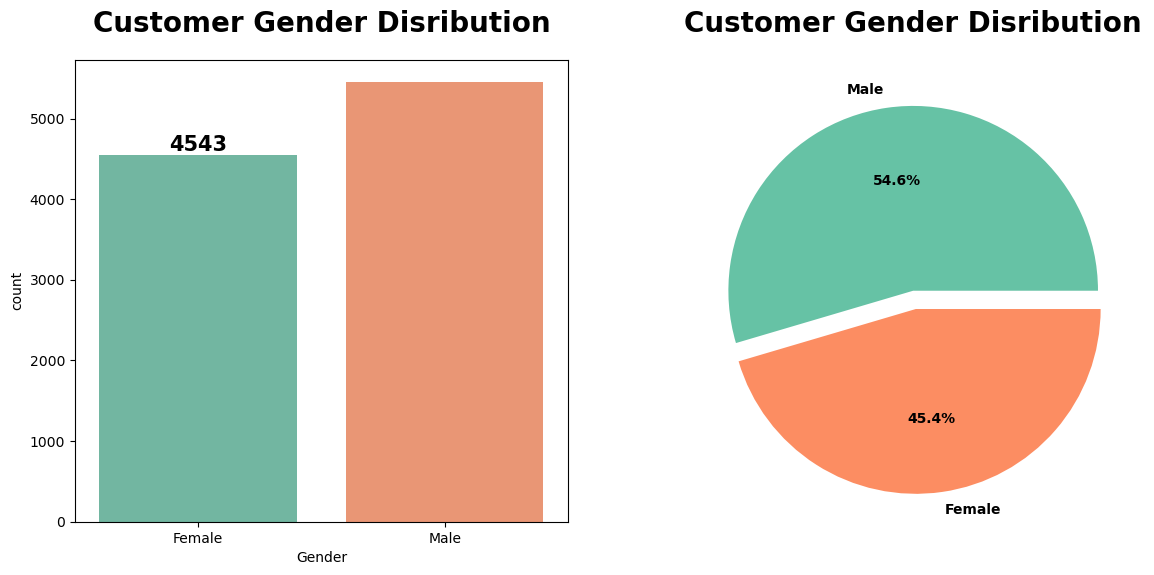

In [53]:
# Count plot and pie chart for Customer Gender Distribution
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df, x="Gender",palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Customer Gender Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0, 0.1])
plt.title("Customer Gender Disribution",fontweight="black",size=20,pad=20)

plt.show()

#### Age Column

In [56]:
df["Age"].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

The mean (38.92) and median (37) are close, suggesting a roughly symmetric age distribution.

The age distribution is slightly skewed (mean > median), meaning there are more people older than the median age pulling the average up.

Most people (middle 50%) are between 32 and 44 years old.

The standard deviation (10.49) indicates moderate spread—ages vary but are mostly within ±10 years of the mean.

The oldest age (92) is an outlier compared to the majority of the data.



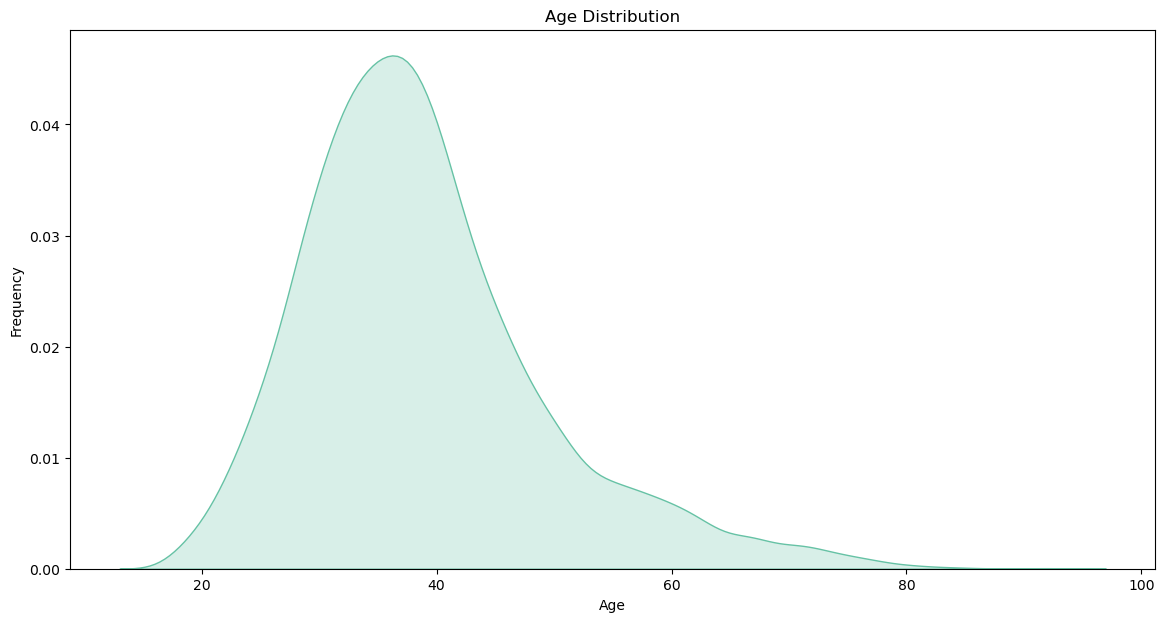

In [59]:

plt.figure(figsize=(14, 7))

sns.kdeplot(df['Age'], fill=True, palette="Set2")
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

#### Tenure Column

In [62]:
df["Tenure"].value_counts()

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

In [64]:
count = df["Tenure"].value_counts()

### count plot
- The count plot generated is a powerful visual tool to quickly assess the distribution of customer tenure. It tells you how many customers fall into each tenure category, which is essential for analyzing customer retention patterns in our bank churn prediction project.
- X-Axis ("Tenure"):
Each bar on the x-axis represents a unique value or category in the "Tenure" variable (for example, the number of years a customer has been with the bank).

- Y-Axis (Count):
The height of each bar indicates how many records (e.g., customers) have that particular tenure value.
- A balanced spread across different tenure values would indicate a more diverse customer base in terms of how long they have been with the bank.


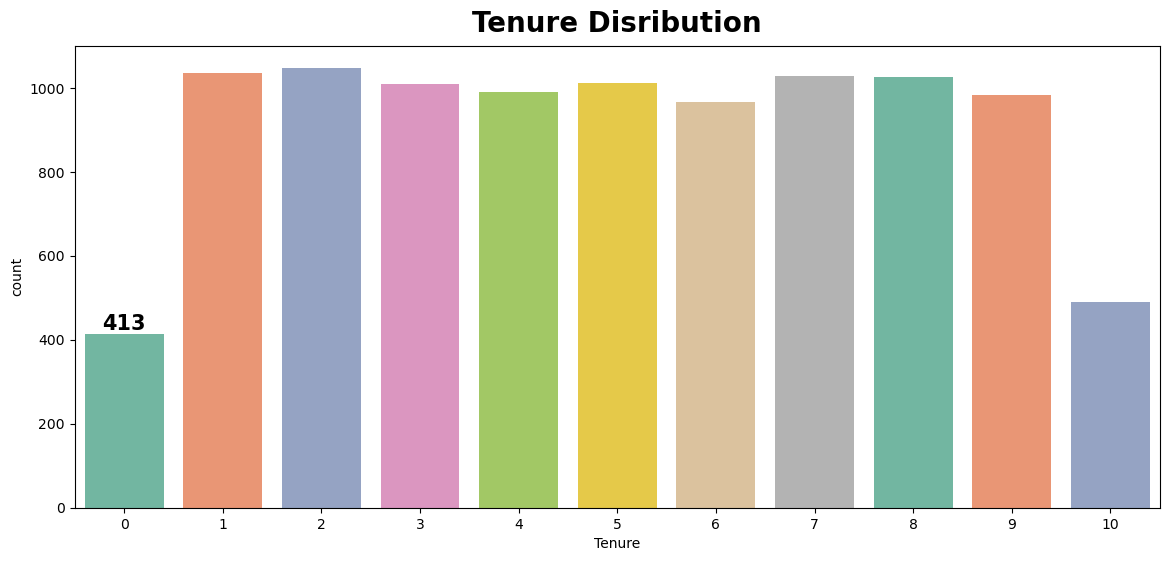

In [67]:
plt.figure(figsize=(14,6))

ax=sns.countplot(data=df, x="Tenure",palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Tenure Disribution",fontweight="black",size=20,pad=10)

plt.show()


#### Balance Column

##### The KDE plot shows a smooth curve that represents the distribution of account balances across your dataset.

- Peaks: The highest point (or points) on the curve indicates where most of the balance values are concentrated.
- Spread: The width of the curve gives you an idea of the variability in balances; a wider curve suggests more variability, while a narrower one indicates that balances are more similar.
- Central Tendency: The peak of the curve is the mode of the balance distribution, meaning it shows the most common range of balance values among customers.

#####  Customer Segmentation: Understanding balance distribution can help in segmenting customers, for instance, distinguishing between low-balance and high-balance customers.


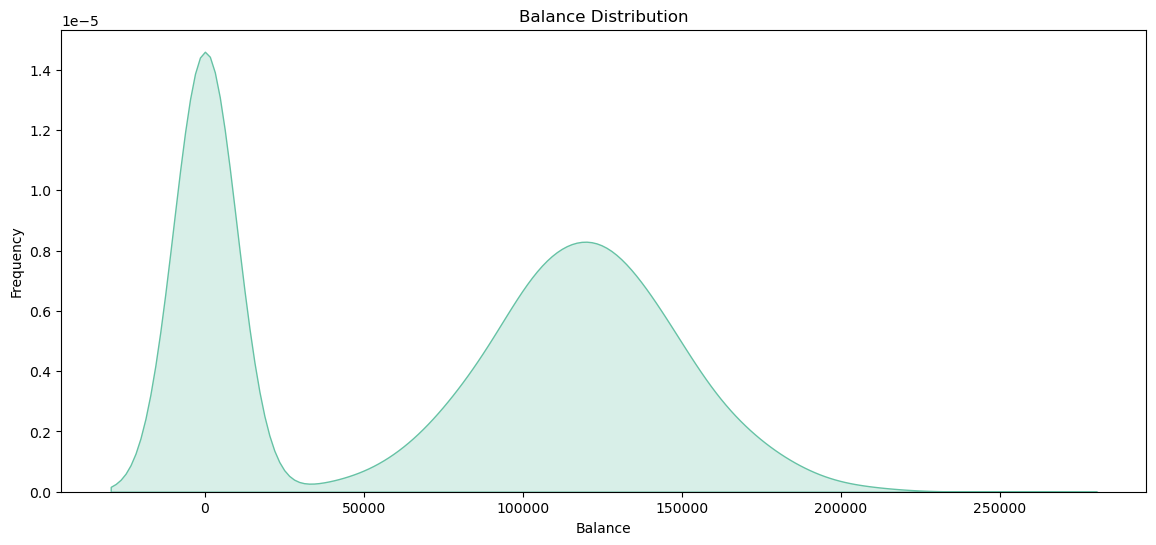

In [71]:
plt.figure(figsize=(14, 6))

sns.kdeplot(df['Balance'], fill=True, palette="Set2")
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')

plt.show()

#### Number Of product Column

In [74]:
df["NumOfProducts"].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

The bar chart provides a clear view of how many products customers hold:

Each bar corresponds to a specific number of products (e.g., 1, 2, 3, ...).
The height of the bar indicates the number of customers with that specific count.


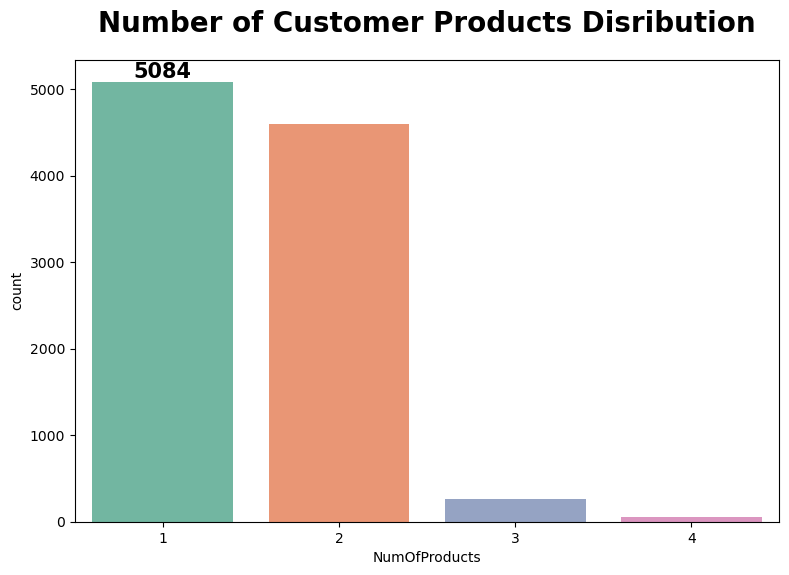

In [77]:
count = df["NumOfProducts"].value_counts()

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df, x="NumOfProducts",palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Number of Customer Products Disribution",fontweight="black",size=20,pad=20)

plt.show()

#### EstimatedSalary

In [80]:
df['EstimatedSalary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64


### The mean (100K) and median (100K) are very close, indicating a roughly symmetrical salary distribution.

- The KDE plot shows how the "EstimatedSalary" values are distributed:
- A wide curve suggests a broad range of salaries, whereas a narrow curve suggests that most customers earn around the same amount.
- A right-skewed curve (longer tail on the right) might indicate that while most customers earn less, a few earn significantly more, which could impact financial product targeting or risk assessment.



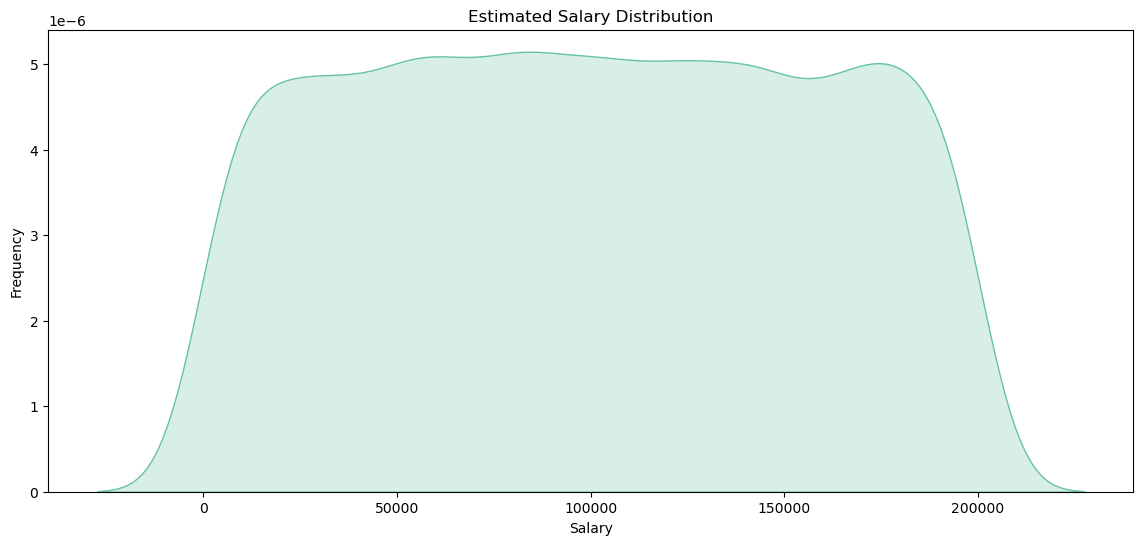

In [84]:
plt.figure(figsize=(14, 6))

sns.kdeplot(df['EstimatedSalary'], fill=True, palette="Set2")
plt.title('Estimated Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')

plt.show()

### Exited Column

In [87]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

- Displayed the raw counts of customers for each category of the "Exited" variable (e.g., 0 for not churned, 1 for churned).
- You can directly see how many customers have churned versus not churned.
- The numeric labels on each bar provide precise counts, which helps identify any class imbalance (e.g., if significantly more customers did not churn compared to those that did).
- The side-by-side presentation (one bar chart and one pie chart) offers both numerical precision (through counts) and a quick visual summary (through percentages).


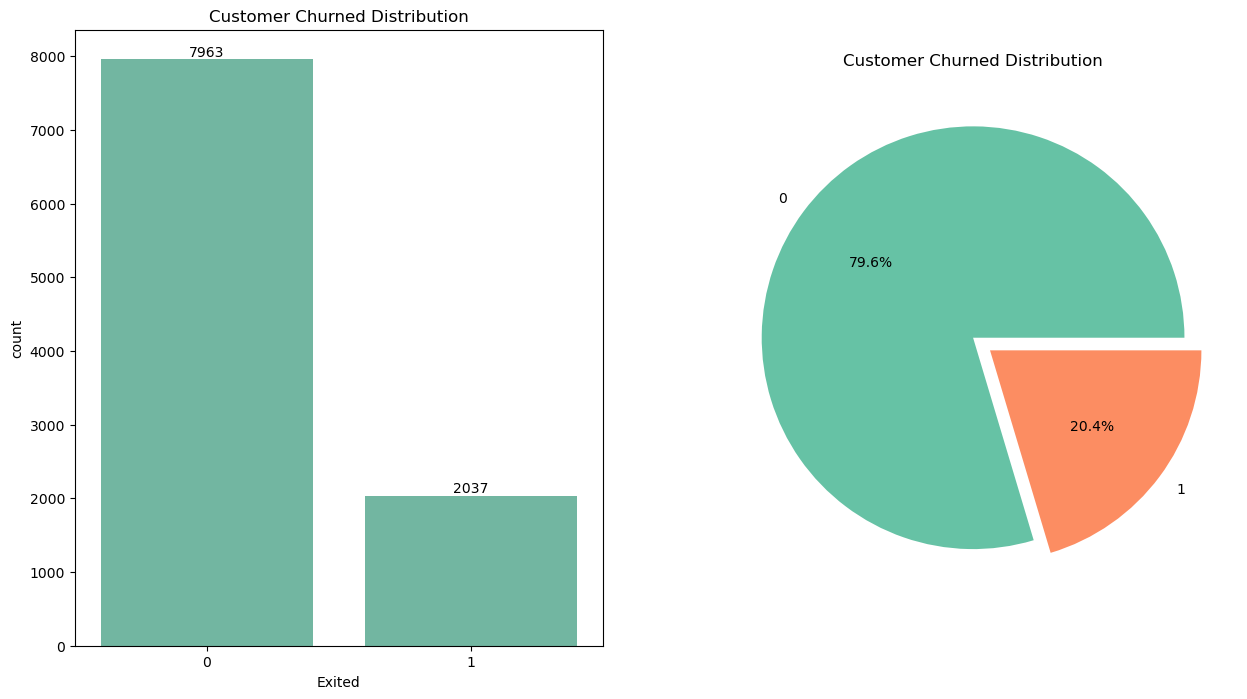

In [90]:
# Analyze the 'Exited' column (target variable)
# This shows the distribution of customers who churned (Exited=1) vs. those who didn't (Exited=0)

plt.figure(figsize=(15, 8))  # Set the figure size

# Create a countplot to visualize the churn distribution
plt.subplot(1, 2, 1)  # Create a subplot (1 row, 2 columns, first plot)
ax = sns.countplot(x='Exited', data=df)  # Countplot of 'Exited' column
plt.title("Customer Churned Distribution")  # Title of the plot
ax.bar_label(ax.containers[0])  # Add labels to the bars

# Create a pie chart to visualize the churn distribution
plt.subplot(1, 2, 2)  # Create a subplot (1 row, 2 columns, second plot)
plt.pie(df['Exited'].value_counts(), labels=df['Exited'].value_counts().index,
        autopct="%1.1f%%", explode=[0, 0.1])  # Pie chart of 'Exited' column
plt.title("Customer Churned Distribution")  # Title of the plot

plt.show()  # Display the plots

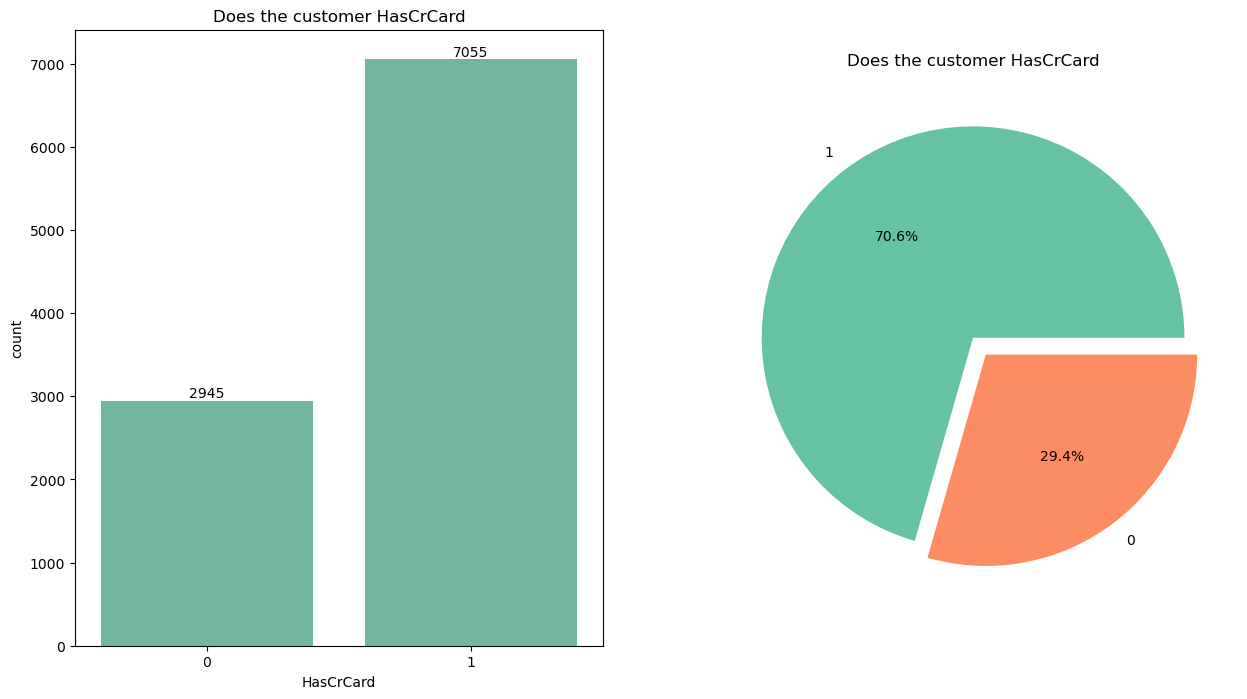

In [92]:
# Analyze the 'HasCrCard' column
# This shows the distribution of customers who have a credit card (HasCrCard=1) vs. those who don't (HasCrCard=0)

plt.figure(figsize=(15, 8))  # Set the figure size

# Create a countplot to visualize the credit card distribution
plt.subplot(1, 2, 1)  # Create a subplot (1 row, 2 columns, first plot)
ax = sns.countplot(x='HasCrCard', data=df)  # Countplot of 'HasCrCard' column
plt.title("Does the customer HasCrCard")  # Title of the plot
ax.bar_label(ax.containers[0])  # Add labels to the bars

# Create a pie chart to visualize the credit card distribution
plt.subplot(1, 2, 2)  # Create a subplot (1 row, 2 columns, second plot)
plt.pie(df['HasCrCard'].value_counts(), labels=df['HasCrCard'].value_counts().index,
        autopct="%1.1f%%", explode=[0, 0.1])  # Pie chart of 'HasCrCard' column
plt.title("Does the customer HasCrCard")  # Title of the plot

plt.show()  # Display the plots


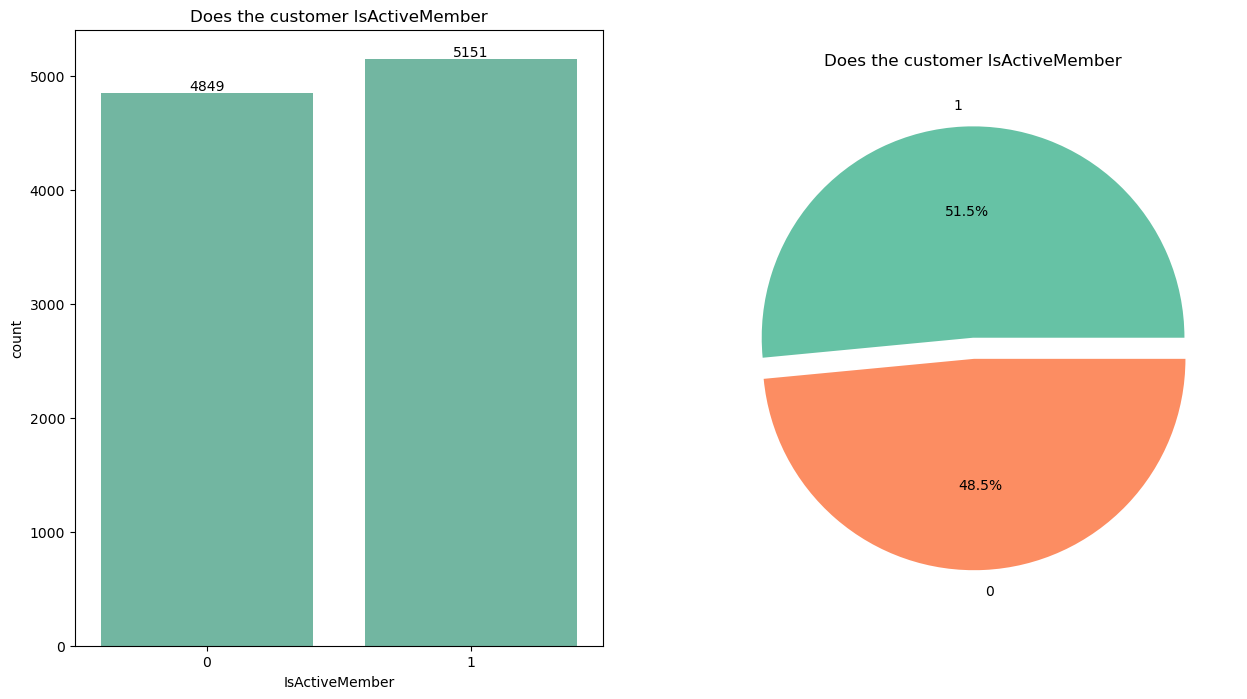

In [94]:
# Analyze the 'IsActiveMember' column
# This shows the distribution of customers who are active members (IsActiveMember=1) vs. those who are not (IsActiveMember=0)

df['IsActiveMember'].value_counts()  # Get the counts for each category

plt.figure(figsize=(15,8))  # Set the figure size

# Create a countplot to visualize the active member distribution
plt.subplot(1,2,1)  # Create a subplot (1 row, 2 columns, first plot)
ax=sns.countplot(x='IsActiveMember',data=df)  # Countplot of 'IsActiveMember' column
plt.title("Does the customer IsActiveMember")  # Title of the plot
ax.bar_label(ax.containers[0])  # Add labels to the bars

# Create a pie chart to visualize the active member distribution
plt.subplot(1,2,2)  # Create a subplot (1 row, 2 columns, second plot)
plt.pie(df['IsActiveMember'].value_counts(), labels=df['IsActiveMember'].value_counts().index,
        autopct="%1.1f%%",explode=[0,0.1])  # Pie chart of 'IsActiveMember' column
plt.title("Does the customer IsActiveMember")  # Title of the plot

plt.show()  # Display the plots

### Bivariate Analysis¶


### Numerical Features vs. Churn (Exited)

- Each boxplot will display the distribution of a numerical feature separately for customers who did not churn (Exited = 0) and those who churned (Exited = 1). Here's what to look for
- The horizontal line in each box represents the median value.
- * Feature Insights:

- CreditScore: If the median credit score for customers who churn is lower compared to those who don’t, it suggests that lower credit scores might be associated with higher churn risk.
- Age: Differences in the age distribution between the two groups can highlight whether younger or older customers are more prone to churn.
- Balance: Variability in account balances might indicate that either very low or very high balances are linked to customer churn.
- EstimatedSalary: Comparing salary distributions can reveal if salary levels impact the likelihood of churn.

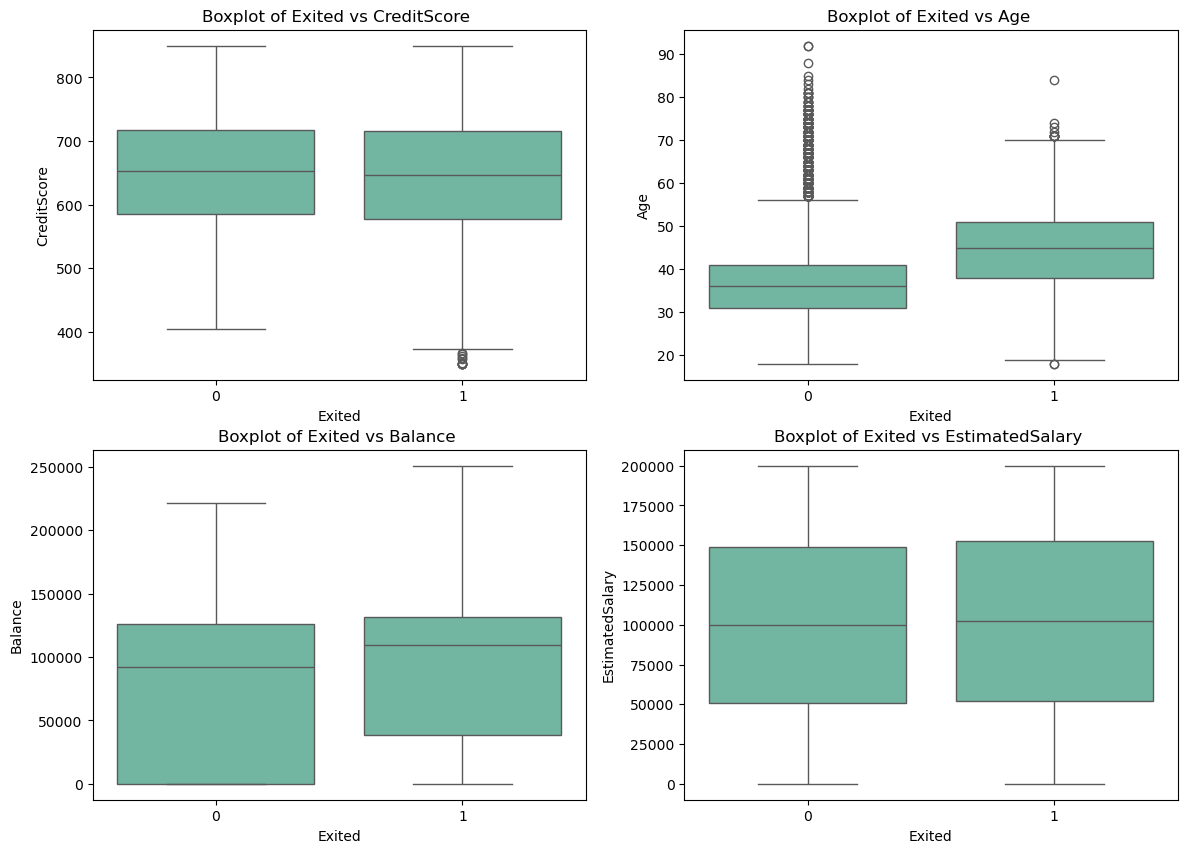

In [99]:
# Bivariate Analysis - Numerical Features vs. Churn (Exited)

# List of numerical features to analyze
numerical_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

plt.figure(figsize=(14,10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)  # Create subplots for each feature
    sns.boxplot(x=df['Exited'],y=feature,data=df)  # Create box plots
    plt.title(f'Boxplot of Exited vs {feature} ') # Set title for each subplot
plt.show()  # Display the plots


### Categorical Features vs. Churn (Exited)
- Comparison of Churn Across Categories:

- For each categorical feature (e.g., Geography, Gender, etc.), you see side-by-side counts of customers segmented by the "Exited" status.
Example: In the "Geography" plot, you might see bars for each region (France, Germany, Spain) with different colors for churned vs. not churned customers.
- * Identifying Patterns and Imbalances:

- High Churn in a Category: If one category (say, a specific geography) has a noticeably higher proportion of churned customers compared to others, that might indicate a region-specific issue.
- Gender Differences: The "Gender" plot can reveal if one gender has a higher churn rate.
- Customer Engagement: "IsActiveMember" and "HasCrCard" plots can show if being an active member or having a credit card is associated with lower or higher churn.
- Product Utilization: "NumOfProducts" might indicate whether having more or fewer products correlates with the likelihood of churn.

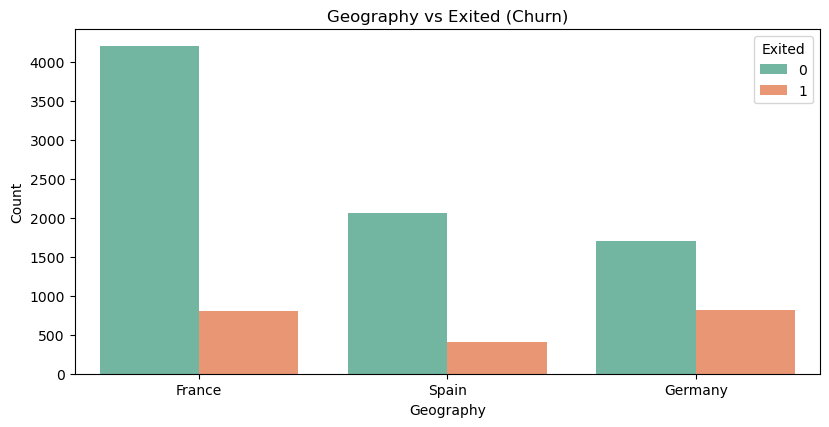

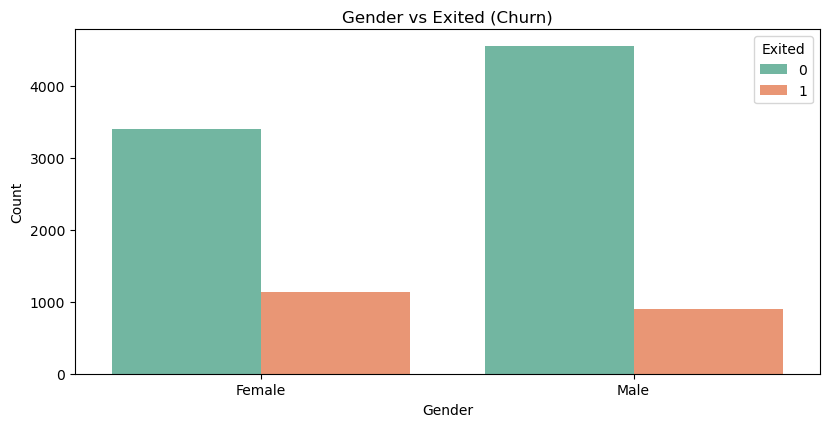

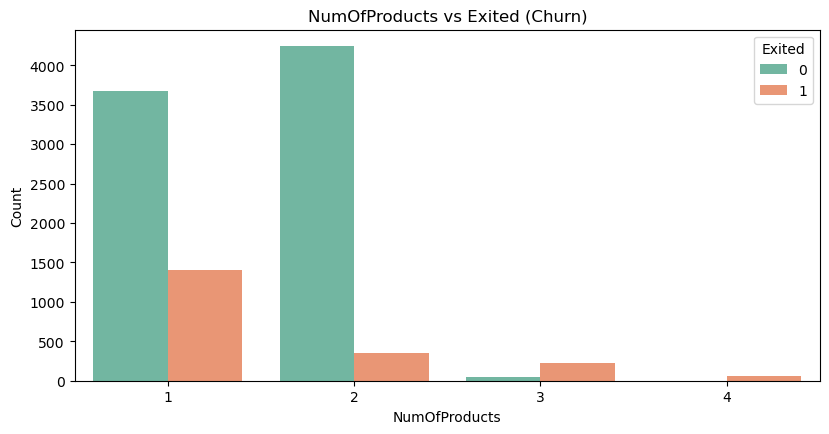

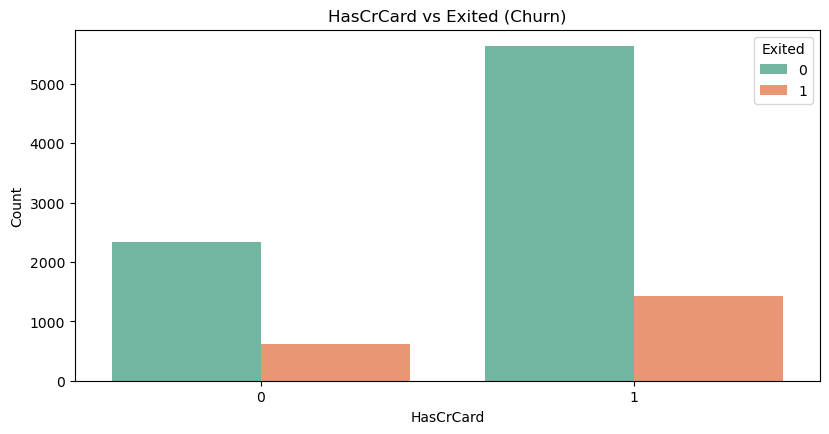

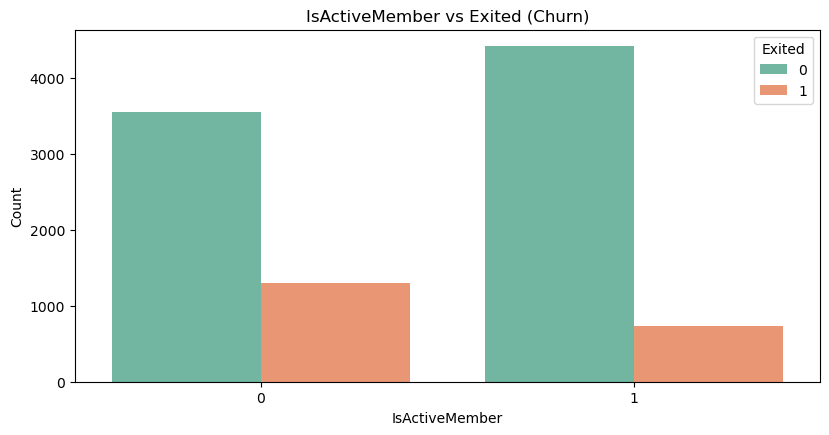

In [101]:
# Bivariate Analysis - Categorical Features vs. Churn (Exited)

# List of categorical features to analyze
categorical_features = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

# Plotting the relationship between each categorical feature and churn (Exited)
for i, feature in enumerate(categorical_features, 1):
    plt.figure(figsize=(16, 12))
    plt.subplot(3, 2, i)
    sns.countplot(x=feature, hue='Exited', data=df)  # Create count plots
    plt.title(f'{feature} vs Exited (Churn)')  # Set title for each subplot
    plt.xlabel(feature)  # Label x-axis
    plt.ylabel('Count')  # Label y-axis
    plt.tight_layout()  # Adjust layout for better visualization
    plt.show()  # Display the plots

### Multivariate Analysis

## correlation Matrix
- Correlations with "Exited":Look at the column and row corresponding to "Exited" to see how each feature is associated with customer churn.
- Positive Correlation: A positive value suggests that as the feature increases, the probability of a customer exiting also increases.
- Negative Correlation: A negative value suggests that as the feature increases, the likelihood of churn decreases.

- Example Interpretations:

If "Balance" has a high positive correlation with "Exited," it might indicate that customers with higher account balances are more likely to churn.
If "Age" shows a negative correlation with "Exited," it might suggest that older customers are less likely to leave.

** Identifying features with strong correlations to churn can help prioritize which customer characteristics need attention.**


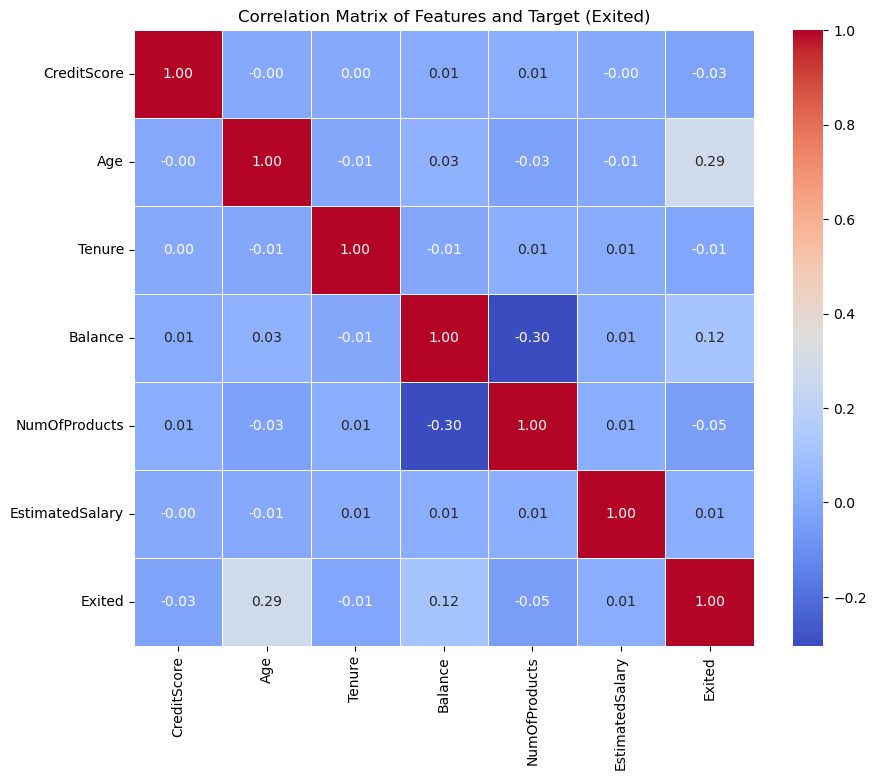

In [103]:
# Multivariate Analysis - Correlation Matrix

# Include the target 'Exited' and numerical features for correlation analysis
numerical_features_with_target = ['CreditScore', 'Age', 'Tenure', 'Balance',
                                   'NumOfProducts', 'EstimatedSalary', 'Exited']

# Compute the correlation matrix
correlation_matrix = df[numerical_features_with_target].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features and Target (Exited)')
plt.show()

In [105]:
# One-hot encoding for Geography feature
# This converts the 'Geography' column into multiple numerical columns (one for each country)
df = pd.get_dummies(df, columns=['Geography'], drop_first=False)

- * Applied one-hot encoding for features like Geography.(One-hot encoding is a common technique in machine learning used to convert categorical data into a numerical format that most ML algorithms can work with. one-hot encoding transforms each category into a new binary feature.)
- * Used label encoding for features like Gender.(This is essential because many ML algorithms require numeric input, and label encoding provides a straightforward way to translate categories into integers.)
- * Handled missing values and normalized numerical features.

In [107]:
# Label encoding for Gender feature
# Convert 'Gender' column into numerical using Label Encoding

from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

label_encoder = LabelEncoder()  # Create a LabelEncoder object
df['Gender'] = label_encoder.fit_transform(df['Gender'])  # Apply label encoding to 'Gender' column

In [109]:
df

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,True,False,False
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,True,False,False
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,True,False,False
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,1,39,5,0.00,2,1,0,96270.64,0,True,False,False
9996,9997,15569892,Johnstone,516,1,35,10,57369.61,1,1,1,101699.77,0,True,False,False
9997,9998,15584532,Liu,709,0,36,7,0.00,1,0,1,42085.58,1,True,False,False
9998,9999,15682355,Sabbatini,772,1,42,3,75075.31,2,1,0,92888.52,1,False,True,False


### Training Model and handling imbalanced dataset
- * Model Training:
- * Build and compare classification models (Logistic Regression, Decision Trees, Random Forest, XGBoost).
The CatBoost model was trained on this preprocessed data.
- * CatBoost is particularly strong with categorical features, reducing the need for extensive manual tuning.
- * We evaluated the model using metrics like accuracy, precision, and recall, ensuring robust performance.
  *  using some popular  classification algorithms to testing and training our model:


In [112]:
#This code removes specific columns from the DataFrame that are not needed for modeling

df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [114]:
#This code splits the DataFrame into two parts:
#one containing all the features (x) except the target, and one containing only the target variable (y).
x = df.drop(columns=["Exited"])
y = df["Exited"]

In [116]:
# x is all the column except our target column exited
x

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,True,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,False,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,True,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,True,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,True,False,False
9996,516,1,35,10,57369.61,1,1,1,101699.77,True,False,False
9997,709,0,36,7,0.00,1,0,1,42085.58,True,False,False
9998,772,1,42,3,75075.31,2,1,0,92888.52,False,True,False


In [118]:
# y is our target column, in this case, 'Exited' which shows whether a customer churned or not
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

## Split the data into training and testing sets

In [121]:
# Split into Train and test sets, This specifies that 20% of the data will be reserved for th e testing set,
# and the remaining 80% will be used for training.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Scaling the data
- Scaling ensures that each feature contributes equally to the distance calculations or the optimization process.
- We'll use Standardization here. Standardization transforms the features to have a mean of 0 and a standard deviation of 1. This is useful - when the features have different units or scales.

In [124]:
# Create a StandardScaler instance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression

In [127]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=40, max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set and evaluate
y_pred = model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score: 0.811
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Confusion Matrix:
 [[1543   64]
 [ 314   79]]


### CatBoost Classifier

In [130]:
# Install catboost if not already installed
!pip install catboost --trusted-host pypi.org --trusted-host files.pythonhosted.org

In [131]:
from catboost import CatBoostClassifier

In [132]:
# Initialize the CatBoost model
catboost_model = CatBoostClassifier(iterations=100, random_seed=42, verbose=0)

# Train the model
catboost_model.fit(X_train, y_train)

# Predict on the test set and evaluate
y_pred_catboost = catboost_model.predict(X_test)
print("CatBoost Accuracy Score:", accuracy_score(y_test, y_pred_catboost))

# Classification report
print("CatBoost Classification Report:\n", classification_report(y_test, y_pred_catboost))

# Confusion matrix
print("CatBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_catboost))

CatBoost Accuracy Score: 0.8655
CatBoost Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92      1607
           1       0.73      0.50      0.59       393

    accuracy                           0.87      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000

CatBoost Confusion Matrix:
 [[1536   71]
 [ 198  195]]


### Random Forest Classifier

In [135]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
forest_clf = RandomForestClassifier()

# Fit the model to the training data
forest_clf.fit(X_train, y_train)

# Predict on the test data
y_pred_forest = forest_clf.predict(X_test)

# Evaluate the model
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print(f"Random Forest Classifier:\n Accuracy: {accuracy_forest:.4f}\n")

# Optionally, display more evaluation details
print("Classification Report:")
print(classification_report(y_test, y_pred_forest))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_forest))


Random Forest Classifier:
 Accuracy: 0.8645

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000

Confusion Matrix:
[[1546   61]
 [ 210  183]]


### K-Nearest Neighbors (KNN)

In [140]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
knn_clf = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn_clf.fit(X_train, y_train)

# Predict on the test data
y_pred_knn = knn_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_knn)
print(f"K-Nearest Neighbors Classifier:\nAccuracy: {accuracy:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

K-Nearest Neighbors Classifier:
Accuracy: 0.8300

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1607
           1       0.61      0.37      0.46       393

    accuracy                           0.83      2000
   macro avg       0.74      0.66      0.68      2000
weighted avg       0.81      0.83      0.81      2000

Confusion Matrix:
[[1514   93]
 [ 247  146]]


### XGBoost (eXtreme Gradient Boosting) Classifier

In [143]:
# Install lightgbm
!pip install xgboost

# Importing LightGBM
import xgboost as xgb

In [145]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the XGBoost Classifier
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Fit the model to the training data
xgb_clf.fit(X_train, y_train)

# Predict on the test data
y_pred_xgb = xgb_clf.predict(X_test)

# Evaluate the model using accuracy and other classification metrics
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Classifier:\nAccuracy: {accuracy:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

XGBoost Classifier:
Accuracy: 0.8625

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.71      0.51      0.59       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000

Confusion Matrix:
[[1523   84]
 [ 191  202]]


##  LightGBM Classifier

In [153]:
from lightgbm import LGBMClassifier as lgb

In [157]:
from lightgbm import LGBMClassifier

In [159]:
# Initialize the LightGBM model
model = LGBMClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set and evaluate
y_pred = model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

[LightGBM] [Info] Number of positive: 1644, number of negative: 6356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000303 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 866
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205500 -> initscore=-1.352267
[LightGBM] [Info] Start training from score -1.352267
Accuracy Score: 0.8625
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.73      0.48      0.58       393

    accuracy                           0.86      2000
   macro avg       0.80      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000

Confusion Matrix:
 [[1536   71]
 [ 204  189]]


In [165]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize classification models
models = {
    "Random Forest Classifier": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "XGBoost Classifier": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM Classifier": LGBMClassifier(),
    "CatBoost Classifier": CatBoostClassifier(verbose=0)
}

# Initializing Best Model Trackers
best_model = None
best_accuracy = 0.0  # Higher accuracy is better for classification

# Train each model and evaluate its performance
for name, model in models.items():
    # Fit the model to the training data (assuming X_train_scaled and y_train are defined)
    model.fit(X_train, y_train)
    
    # Predict on the test data (assuming X_test_scaled and y_test are defined)
    y_pred = model.predict(X_test)
    
    # Evaluate the model using accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}:\n Accuracy: {accuracy:.4f}\n")
    
    # Select the best model based on accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_model_name = name

print(f"\nBest Model: {best_model_name}\nBest Accuracy: {best_accuracy:.4f}")

Random Forest Classifier:
 Accuracy: 0.8675

K-Nearest Neighbors:
 Accuracy: 0.8300

XGBoost Classifier:
 Accuracy: 0.8625

[LightGBM] [Info] Number of positive: 1644, number of negative: 6356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000111 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 866
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205500 -> initscore=-1.352267
[LightGBM] [Info] Start training from score -1.352267
LightGBM Classifier:
 Accuracy: 0.8625

CatBoost Classifier:
 Accuracy: 0.8680


Best Model: CatBoost Classifier
Best Accuracy: 0.8680


In [167]:
import pickle

In [169]:
# Save the CatBoost model to a file named "churn_model.pkl" using pickle
with open("churn_model.pkl", "wb") as file:
    pickle.dump(catboost_model, file)

In [171]:
df.to_csv("CHURNPRE.csv", index=False)

### deploy to streamlit
- * Deployment on Streamlit
- * Interactive Dashboard:
The Streamlit app allows users to input key customer features (e.g., Credit Score, Age, Geography, Gender, etc.) via an intuitive sidebar.
- * Real-Time Predictions:
Once the user inputs customer details and clicks "Predict Churn," the model outputs:
- * A binary prediction (Churn / Not Churn)
- * Prediction probabilities to help gauge the risk level.

In [174]:
'''
import streamlit as st
import pickle
import numpy as np
import pandas as pd

# Load your trained model (make sure 'churn_model.pkl' exists in your working directory)
model = pickle.load(open('churn_model.pkl', 'rb'))

# Set the title of the app
st.title("Bank Churn Prediction App")
st.write("Enter customer details to predict if a customer is likely to churn.")

# Sidebar for user input features
st.sidebar.header("Customer Input Features")

def user_input_features():
    credit_score = st.sidebar.slider("Credit Score", 300, 850, 600)
    geography = st.sidebar.selectbox("Geography", ("France", "Spain", "Germany"))
    gender = st.sidebar.selectbox("Gender", ("Male", "Female"))
    age = st.sidebar.slider("Age", 18, 100, 30)
    tenure = st.sidebar.slider("Tenure (years)", 0, 10, 5)
    balance = st.sidebar.number_input("Account Balance", value=0.0)
    num_of_products = st.sidebar.slider("Number of Products", 1, 4, 1)
    has_cr_card = st.sidebar.selectbox("Has Credit Card", ("Yes", "No"))
    is_active_member = st.sidebar.selectbox("Is Active Member", ("Yes", "No"))
    estimated_salary = st.sidebar.number_input("Estimated Salary", value=0.0)

    # Create a DataFrame of the input features
    data = {
        "CreditScore": credit_score,
        "Geography": geography,
        "Gender": gender,
        "Age": age,
        "Tenure": tenure,
        "Balance": balance,
        "NumOfProducts": num_of_products,
        "HasCrCard": 1 if has_cr_card == "Yes" else 0,
        "IsActiveMember": 1 if is_active_member == "Yes" else 0,
        "EstimatedSalary": estimated_salary
    }
    features = pd.DataFrame(data, index=[0])
    return features

# Get user input
input_df = user_input_features()

# Display the input data in the app
st.subheader("Customer Input Features")
st.write(input_df)

# (Optional) If your model requires specific preprocessing (e.g., encoding for Geography/Gender),
# ensure the same transformation is applied here as during training.
# For example, if you used one-hot encoding for 'Geography' and 'Gender', apply it here.

# Predict churn when the user clicks the button
if st.button("Predict Churn"):
    # Make prediction using the loaded model
    prediction = model.predict(input_df)
    prediction_proba = model.predict_proba(input_df)

    st.subheader("Prediction")
    churn_label = "Churn" if prediction[0] == 1 else "Not Churn"
    st.write(f"The customer is likely to: **{churn_label}**")

    st.subheader("Prediction Probability")
    st.write(prediction_proba)
'''

'\nimport streamlit as st\nimport pickle\nimport numpy as np\nimport pandas as pd\n\n# Load your trained model (make sure \'churn_model.pkl\' exists in your working directory)\nmodel = pickle.load(open(\'churn_model.pkl\', \'rb\'))\n\n# Set the title of the app\nst.title("Bank Churn Prediction App")\nst.write("Enter customer details to predict if a customer is likely to churn.")\n\n# Sidebar for user input features\nst.sidebar.header("Customer Input Features")\n\ndef user_input_features():\n    credit_score = st.sidebar.slider("Credit Score", 300, 850, 600)\n    geography = st.sidebar.selectbox("Geography", ("France", "Spain", "Germany"))\n    gender = st.sidebar.selectbox("Gender", ("Male", "Female"))\n    age = st.sidebar.slider("Age", 18, 100, 30)\n    tenure = st.sidebar.slider("Tenure (years)", 0, 10, 5)\n    balance = st.sidebar.number_input("Account Balance", value=0.0)\n    num_of_products = st.sidebar.slider("Number of Products", 1, 4, 1)\n    has_cr_card = st.sidebar.selectbo

#### How Predictions Help Improve Churn
* Early Detection:
* Visualized key churn factors and provided business recommendations.
By identifying at-risk customers early, banks can proactively address issues before customers decide to leave.
* Targeted Interventions With insights from the model:
    * Personalized offers, discounts, or better customer service can be provided to those likely to churn.
    * Resource allocation can be optimized to focus on customers who need extra attention.

      
* Cost Savings:
Retaining existing customers is often more cost-effective than acquiring new ones, which can significantly improve overall profitability.
* Policy Feedback:
Analyzing the model's feature importance helps identify which factors contribute most to churn.
- * This information can guide changes to policies that may be driving customers away (e.g., revisiting fees, improving product offerings, or enhancing service quality).

#### Conclusion
* Impact:
The bank churn prediction model not only forecasts churn risk but also provides actionable insights to improve customer retention strategies.

